# <font color='#FFE15D'>**Week 15: KNN 💜⬌💛**</font>

## **🔸 Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 KNN (from Scratch)**

### Data

In [ ]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

### Model

In [ ]:
from scipy.stats import mode

In [ ]:
class KNNClassification:
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
            
    def predict(self, x):
        y_hats = []
        for xi in x:
            distances = np.linalg.norm(self.X - xi, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            y_hat = mode(k_nearest_labels, keepdims=False).mode
            y_hats.append(y_hat)
        return np.array(y_hats)

### Evaluation

In [ ]:
model = KNNClassification(3)
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
y_test == y_hat

### Visualization

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_hat, s=100, cmap='jet', marker='s')

## **🔸 Discussion (Time & Memory)**

In [ ]:
X, y = make_classification(n_samples=200000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

In [ ]:
# x_train.size, x_train.itemsize, x_train.dtype
x_train.size * x_train.itemsize

In [ ]:
model = KNNClassification(3)
model.fit(x_train, y_train)

In [ ]:
%timeit -n 5 model.predict(x_test[[0], :])

## **🔸 Advancements in KNN**

### Search

In [278]:
from sklearn.neighbors import KDTree, BallTree, NearestNeighbors

#### * KD-tree

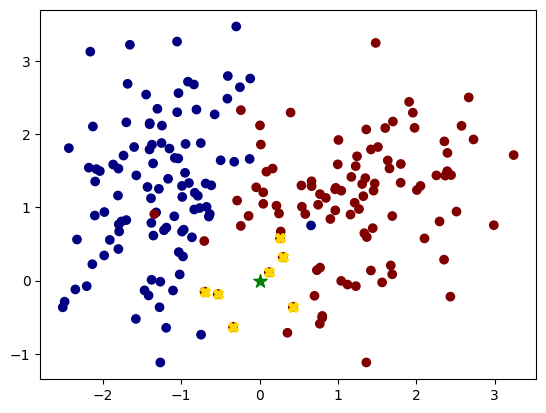

In [289]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

# Construct a KDTree
kdt = KDTree(X, leaf_size=10)

# Query
query_point = np.array([[0, 0]])
_, ind = kdt.query(query_point, k=7)

# Plot the query point
plt.scatter(query_point[0, 0], query_point[0, 1], marker='*', color='green', s=100)

# Plot the nearest neighbors
plt.scatter(X[ind, 0], X[ind, 1], marker='X', color='gold', s=50)

##### ** Decision Region

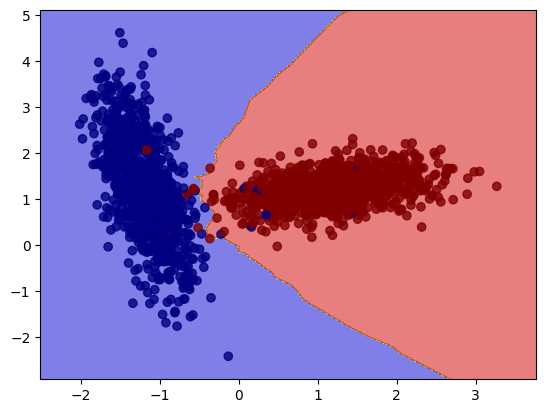

In [315]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

kdt = KDTree(X)


dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

_, ind = kdt.query(Xf, k=5)
labels = mode(y[ind], axis=1, keepdims=False).mode
labels = labels.reshape(xm1.shape)

plt.contourf(xm1, xm2, labels, alpha=0.5, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', alpha=0.8)

##### ** Partitioning

bounds: [-2.20000000e+00 -2.20000000e+00  1.77635684e-15 -2.20000000e+00
 -1.20000000e+00  1.77635684e-15  1.00000000e+00  2.00000000e+00
 -2.00000000e-01  2.00000000e+00 -1.40000000e+00 -2.00000000e-01
  8.00000000e-01  2.00000000e+00]
nodes: [( 0, 22, 0, 2.1) ( 0, 11, 0, 1. ) (11, 22, 0, 1. ) ( 0,  5, 1, 0.4)
 ( 5, 11, 1, 0.5) (11, 16, 1, 0.4) (16, 22, 1, 0.5)]
2.100000000000002


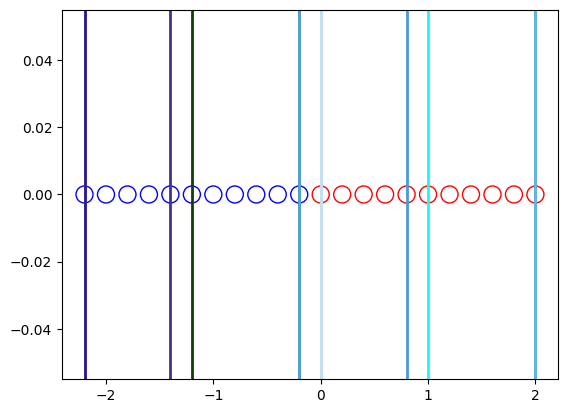

In [348]:
X = np.arange(-2.2, 2.2, 0.2)
y = np.zeros(len(X), dtype=np.int8)
y[X>=0] = 1
X = X[:, None]

colors = ['blue', 'red']
for i, xi in enumerate(X):
    plt.scatter(xi[0], 0, color='none', edgecolor=colors[y[i]], s=150)

kdt = KDTree(X, leaf_size=5)
# kdt.get_arrays()
bounds = kdt.node_bounds.base
nodes = kdt.node_data.base
print('bounds:', bounds.reshape(-1))
print('nodes:', nodes)
# print(bounds)
bounds = bounds.reshape(-1)

for bound in bounds:
    plt.axvline(bound, linewidth=2, color=np.random.rand(3))

print((X.max() - X.min())/2)

#### * Ball-tree

In [ ]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

# Construct a BallTree
...

query_point = np.array([1, 1])  # Example query point
...

# Plot the query point
...

# Plot the nearest neighbors
...

#### * NearestNeigbors

In [361]:
X, _ = make_classification(n_samples=1000, n_features=10, random_state=42)

# k-d tree searcher
kdt = NearestNeighbors(n_neighbors=1, algorithm='kd_tree').fit(X)

# brute force searcher
brute = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X)

query_point = np.full((1, 10), 0.5)

In [362]:
%timeit -r 10 kdt.kneighbors(query_point)

334 µs ± 7.5 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [363]:
%timeit -r 10 brute.kneighbors(query_point)

54.2 ms ± 646 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Metrics

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import mahalanobis

In [ ]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='jet', alpha=0.5)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='jet', marker='s')

In [ ]:
class KNNClassification:
    
    def __init__(self, k, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.inv_cov = np.linalg.inv(np.cov(X.T))
            
    def predict(self, x):
        y_hats = []
        for xi in x:
            if self.metric == 'euclidean':
                distances = np.linalg.norm(self.X - xi, axis=1)
            elif self.metric == 'mahalanobis':
                distances = np.array([mahalanobis(xi, Xi, self.inv_cov) for Xi in self.X])
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            y_hat = mode(k_nearest_labels, keepdims=False).mode
            y_hats.append(y_hat)
        return np.array(y_hats)

In [ ]:
model = KNNClassification(10, metric='mahalanobis')
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
np.sum(y_hat == y_test)

In [ ]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

yf = model.predict(Xf)
ym = yf.reshape(xm1.shape)

plt.contourf(xm1, xm2, ym, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet', edgecolors='w')

### Output

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import mahalanobis
from sklearn.utils.extmath import weighted_mode

In [ ]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='jet', alpha=0.5)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='jet', marker='s')

In [ ]:
class KNNClassification:
    
    def __init__(self, k, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.inv_cov = np.linalg.inv(np.cov(X.T))
    
    def predict(self, x):
        y_hats = []
        for xi in x:
            if self.metric == 'euclidean':
                distances = np.linalg.norm(self.X - xi, axis=1)
            elif self.metric == 'mahalanobis':
                distances = np.array([mahalanobis(xi, Xi, self.inv_cov) for Xi in self.X])
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y[indices] #list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            
            k_nearest_distances = distances[indices]
            weights = self._claculate_weights(k_nearest_distances)
            
            y_hat, _ = weighted_mode(k_nearest_labels, weights)
            y_hats.append(y_hat[0])
        return np.array(y_hats)
    
    def _claculate_weights(self, distances, const=0.01):
        weights = 1 / (distances + const)
        return weights

In [ ]:
model = KNNClassification(10, 'euclidean')
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
np.sum(y_hat == y_test)

In [ ]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

yf = model.predict(Xf)
ym = yf.reshape(xm1.shape)

plt.contourf(xm1, xm2, ym, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet', edgecolors='w')